# Final Report: Campus Event Scheduling System

Setups and Imports

In [142]:
import sys
import time
import random
import datetime
import matplotlib.pyplot as plt

sys.path.append('src')

from scheduler.event import Event, EventNode
from scheduler.eventlist import EventList
from scheduler.linkedeventlist import LinkedEventList
from scheduler.sort import SortingAlgorithm, sort_data
from scheduler.search import SearchAlgorithm, search_data

Part A: Event Storage Structures

For this project, we have implemented two distinct data structures to manage camous events: array-based list (EventList) that mimics a dynamic array, and a LinkedEventList, which acts as singly linked list.

Our EventList is designed to function like a dynamic array, by using standard Python list with fixed-size to mimic array.

TODO: I will finish later.

Part B: Sorting Events

Function to create Dummy Events

In [143]:
def generate_events(n):
    events_data = []
    start_time = datetime.datetime(2025, 1, 1, 9, 0)
    for i in range(n):
        event_time = start_time + datetime.timedelta(hours=i)
        events_data.append({
            "title": f"Event {i}",
            "date": event_time.strftime("%Y-%m-%d"),
            "time": event_time.strftime("%H:%M"),
            "location": f"Location {i}"
        })
    random.shuffle(events_data)
    return events_data

Sorting Array-Based-List


--- Testing size: 50 ---
  Insertion Sort took 0.0006 seconds.
  Merge Sort took 0.0001 seconds.
  Quick Sort took 0.0003 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.0954 seconds.
  Merge Sort took 0.0014 seconds.
  Quick Sort took 0.0069 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 121.5249 seconds.
  Merge Sort took 0.1099 seconds.
  Quick Sort took 1.5095 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 1047.6268 seconds.
  Merge Sort took 0.4284 seconds.
  Quick Sort took 7.6317 seconds.


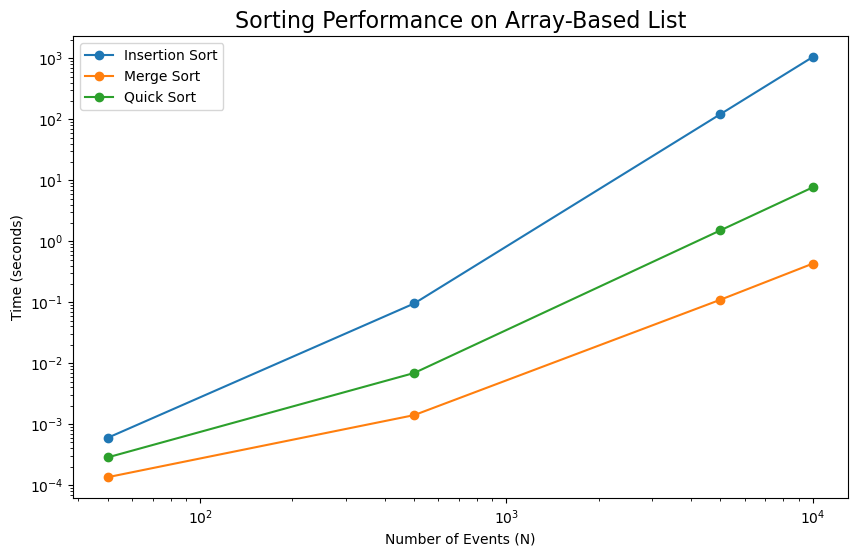

In [147]:
sizes = [50, 500, 5000, 10000]
# For n = 15,000, insertion sort took 63 minutes to finish. Hence not testing for 50,000
sorts_to_test = {
    "Insertion Sort": SortingAlgorithm.INSERTION,
    "Merge Sort": SortingAlgorithm.MERGE,
    "Quick Sort": SortingAlgorithm.QUICK
}
array_results = {name: [] for name in sorts_to_test.keys()}

for n in sizes:
    print(f"\n--- Testing size: {n} ---")
    event_data = generate_events(n)
    
    for sort_name, sort_algo in sorts_to_test.items():
        event_list = EventList()
        for data in event_data:
            event_list.insert(Event(**data))

        start = time.time()
        sort_data(event_list, algorithm=sort_algo)
        duration = time.time() - start
        
        array_results[sort_name].append(duration)
        print(f"  {sort_name} took {duration:.4f} seconds.")

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in array_results.items():
    ax.plot(sizes, timings, marker='o', label=sort_name)

ax.set_title('Sorting Performance on Array-Based List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

Sorting Linked List


--- Testing size: 50 ---
  Insertion Sort took 0.0073 seconds.
  Merge Sort took 0.0022 seconds.
  Quick Sort took 0.0034 seconds.

--- Testing size: 500 ---
  Insertion Sort took 0.7493 seconds.
  Merge Sort took 0.0201 seconds.
  Quick Sort took 0.0655 seconds.

--- Testing size: 5000 ---
  Insertion Sort took 446.8671 seconds.
  Merge Sort took 0.5831 seconds.
  Quick Sort took 5.7369 seconds.

--- Testing size: 10000 ---
  Insertion Sort took 3376.5058 seconds.
  Merge Sort took 1.9017 seconds.
  Quick Sort took 24.0936 seconds.


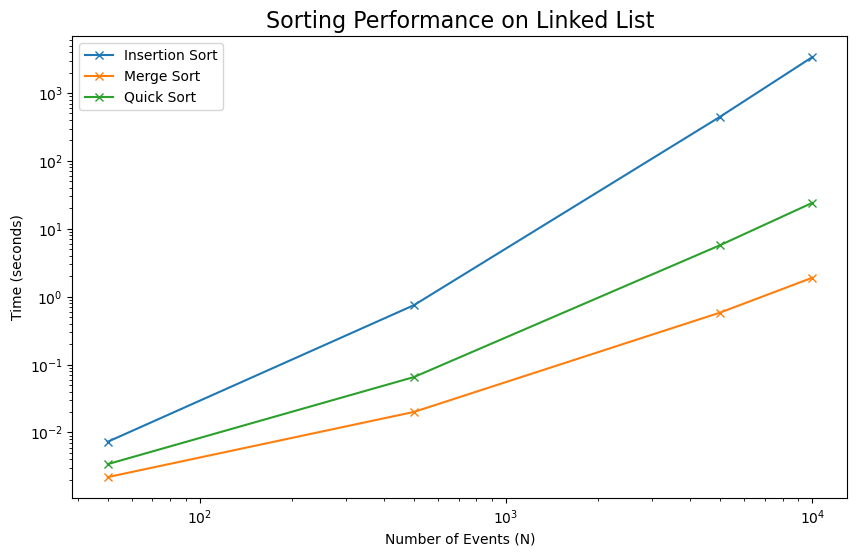

In [149]:
sizes = [50, 500, 5000, 10000] 
linked_list_results = {name: [] for name in sorts_to_test.keys()}

for n in sizes:
    print(f"\n--- Testing size: {n} ---")
    event_data = generate_events(n)
    
    for sort_name, sort_algo in sorts_to_test.items():
        # Create a new linked list for each test
        linked_list = LinkedEventList()
        for data in event_data:
            linked_list.insert(EventNode(**data))

        start = time.time()
        try:
            sort_data(linked_list, algorithm=sort_algo)
            duration = time.time() - start
            linked_list_results[sort_name].append(duration)
            print(f"  {sort_name} took {duration:.4f} seconds.")
        except Exception as e:
            print(f"  {sort_name} failed or was too slow. Error: {e}")
            break 

fig, ax = plt.subplots(figsize=(10, 6))
for sort_name, timings in linked_list_results.items():
    completed_sizes = sizes[:len(timings)]
    ax.plot(completed_sizes, timings, marker='x', label=sort_name)

ax.set_title('Sorting Performance on Linked List', fontsize=16)
ax.set_xlabel('Number of Events (N)')
ax.set_ylabel('Time (seconds)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

Plotting Performance of Data Structures on Each Sorting Algorithm

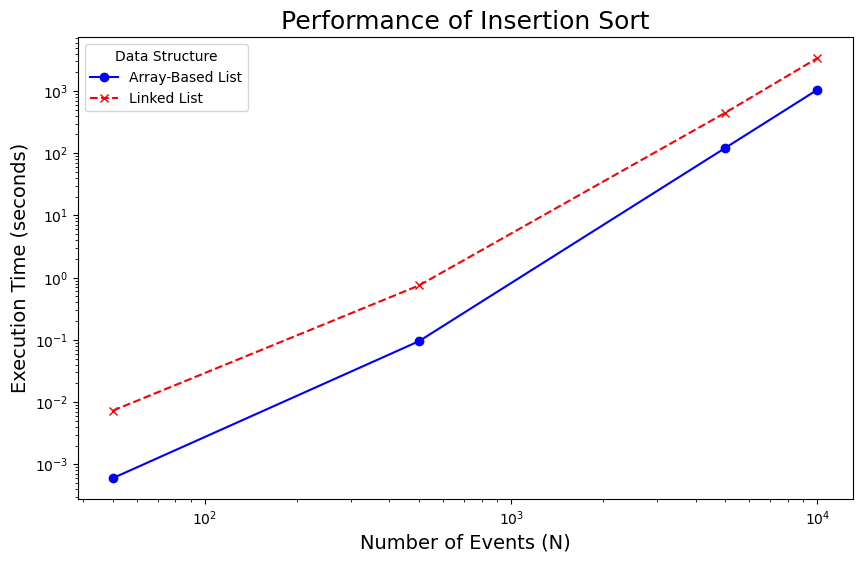

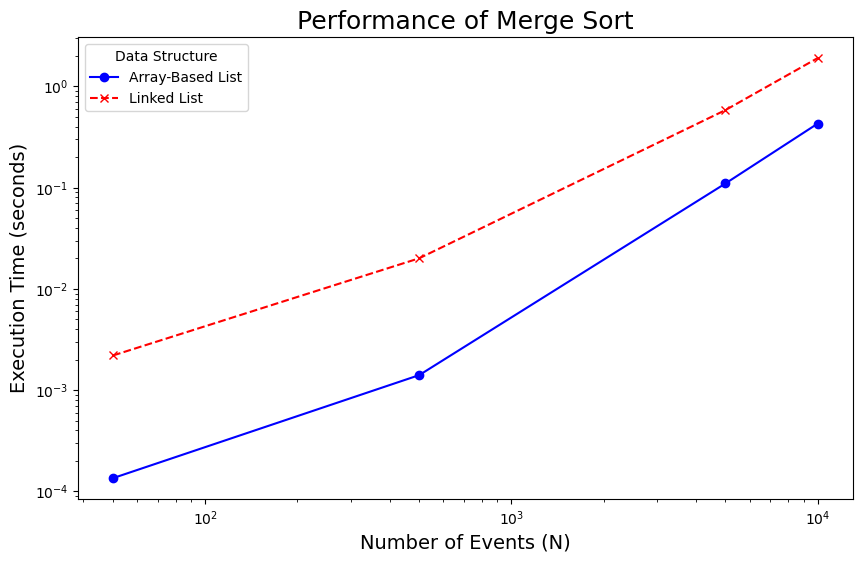

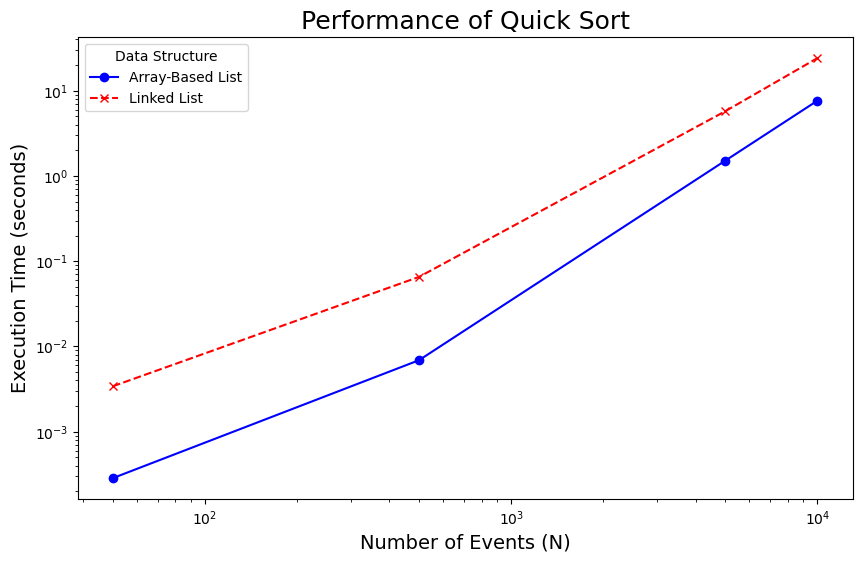

In [151]:
results = {
    "Array List": array_results,
    "Linked List": linked_list_results
}

algorithms_to_plot = ["Insertion Sort", "Merge Sort", "Quick Sort"]

for algo in algorithms_to_plot:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    array_sizes = [50, 500, 5000, 10000] 
    array_timings = results["Array List"][algo]
    ax.plot(array_sizes, array_timings, 
            label="Array-Based List", 
            marker='o', 
            linestyle='-',
            color='blue')

    linked_list_sizes = [50, 500, 5000, 10000] 
    linked_list_timings = results["Linked List"][algo]
    ax.plot(linked_list_sizes, linked_list_timings, 
            label="Linked List", 
            marker='x', 
            linestyle='--',
            color='red')

    ax.set_title(f"Performance of {algo}", fontsize=18)
    ax.set_xlabel("Number of Events (N)", fontsize=14)
    ax.set_ylabel("Execution Time (seconds)", fontsize=14)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(title="Data Structure")
    
    plt.show()

Part C: Searching & Conflict Detection

Searching in Array-Based-List

In [ ]:
#TODO

Searching in Linked List

In [ ]:
#TODO

Plotting Performance of Data Structures on Each Search Algorithm

In [ ]:
#TODO

Part D: Scalability Challenge

1. Estimate memory usage for array vs linked list

2. Suggest optimizations (e.g., indexing, hybrid structures).

3. Sketch a design for parallel conflict detection (multi-core idea)

Part E: Teamwork

In [ ]:
#TODO